# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dans le fichier DataAll.csv

Toutes les données de puis 1300h à partir 7 mars au 30 avril

SELECT mean("temperature") AS "mean_temperature", mean("moisture-percent") AS "mean_moisture-percent" 

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 1300h 

GROUP BY time(30m) FILL(null)

# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
from traitement import Traitement


df = pd.read_csv('DataAll.csv')

t= Traitement()

#Création des deux autres colonnes
df = t.ajoutData(df)


## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30.

In [3]:
import datetime

df = t.arrosageHist(df,1)


# Delete NaN Value

In [4]:
i = 37

df = t.eliminateNaNValue(df,i)
#Delete the data that are not inside a loop of one day
df.drop(df.index[range(0,i)],axis = 0,inplace = True)
nligne = df.shape[0]


1237
2245
2245


In [5]:
nligne = df.shape[0]
nColumn = df.shape[1]
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
ArrosageHist             0
dtype: int64


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
reg.coef_

array([-0.02113182, -0.01721875,  0.30066749])

In [8]:
reg.intercept_

0.74272914889584452

In [9]:
reg.predict([[31,25,10]])[0]

2.6638488606147197

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [10]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
reg2.coef_

array([-0.01434274,  0.00393448,  0.31060324,  0.00032518])

In [12]:
reg2.intercept_

-0.18349768231499866

In [13]:
reg2.predict([[31,25,10,0]])[0]

2.5762718176072337

# Test de mes résultats

SANS DES DONNÉES POUR VERIFICATIONS. PAS DE DATA TEST.

Le but est de faire une boucle sur une période en utilisant les valeurs obtenus à l'itérations précédentes

Creation de liste de planification de l'arrosage pour le test



## Test avec data Test

Création d'une data frame pour effectuer les tests.

Voici la query effectuer pour obtenir les données.

SELECT mean("moisture-percent") AS "mean_moisture-percent" ,  mean("temperature") AS "mean_temperature"

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 700h AND time < now() -400h

GROUP BY time(30m)

Pour le fichier Data30AprilTo8Mai.csv voici la query effectuer : 

SELECT mean("moisture-percent") AS "mean_moisture-percent" FROM "demeter"."autogen"."chirp-left" WHERE time > now() - 200h GROUP BY time(30m) FILL(null)

In [14]:
#dfTest = pd.read_csv('DataTest.csv')
dfTest = pd.read_csv('Data30AprilTo8Mai.csv')

#initdatatest = 31
initdatatest = 17

dfTest = t.ajoutData(dfTest)

In [15]:
import datetime

dfTest = t.arrosageHist(dfTest,1)
    
#Eliminate NaN value
dfTest = t.eliminateNaNValue(dfTest,initdatatest)

#Delete the data that are not inside a loop of one day
dfTest.drop(dfTest.index[range(0,initdatatest)],axis = 0,inplace = True)
nligneTest = dfTest.shape[0]


## Test avec les donnes SANS le temps

In [16]:
init = 0+48*0
dfTest['resultSansT'] = dfTest.index
position = dfTest.shape[1]-1

StartHumidity = dfTest.iloc[init,1]
TestSize = nligneTest
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,position].values)
print("Moyenne d'erreur : ",ErrSansTemps)


Moyenne d'erreur :  -3.46953005488


## Test avec les donnes AVEC le temps

In [17]:
init = 0+48*0
dfTest['resultAvecT'] = dfTest.index
position = dfTest.shape[1]-1

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,position].values)
print("Moyenne d'erreur : ",ErrTemps)


Moyenne d'erreur :  -2.9166448874


In [18]:
dfTest.iloc[48]

date                     5/1/2019 11:30:00.000000000 AM
mean_moisture-percent                            21.915
mean_temperature                                  24.28
moistureAdd                                        8.29
temperatureAdd                                   -0.615
Arrosage                                             40
TAfterArrosage                                        0
ArrosageHist                                         40
resultSansT                                     21.9893
resultAvecT                                     23.2135
Name: 65, dtype: object

# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [19]:
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
tmp = df.loc[df['TAfterArrosage'] > 0]
dfStabilisation = df.loc[df['TAfterArrosage'] > 450]
dfEvaporation = tmp.loc[df['TAfterArrosage'] <= 450]

In [20]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage']],dfArrosage.moistureAdd)

regLinearAro.coef_
regLinearAro.intercept_

5.4278470080156902

In [21]:
# Pour faire le régression linear sur le moment d'arrosage

regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist']],dfEvaporation.moistureAdd)

regLinearEva.intercept_
regLinearEva.coef_

array([ -1.04419747e-02,   2.06084293e-02,   3.54597845e-03,
        -4.51813793e-05])

In [22]:
# Pour faire le régression linear sur le moment d'arrosage

regLinearSta = linear_model.LinearRegression()
regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage']],dfStabilisation.moistureAdd)

regLinearSta.intercept_
regLinearSta.coef_

array([ -2.81974262e-03,   8.93414074e-03,   1.17505415e-06])

In [23]:
#Pour tester sur la base de données de training
init = 0
base = dfTest 

In [24]:
dfTest['resultSepare'] = dfTest.index
StartHumidity = base.iloc[init,1]
position = dfTest.shape[1]-1


TestSize = nligneTest
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize):
    dfTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        nAro =+ 1
        StartHumidity = dfTest.iloc[init+i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,5]]])[0]
        ErrAro =+ dfTest.iloc[int(i),position] - base.iloc[i,1]
    elif i%48 <= 15:
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7]]])[0]
        ErrEva =+ dfTest.iloc[int(i),position] - base.iloc[i,1]
    else:
        result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6]]])[0]
        ErrEva =+ dfTest.iloc[int(i),position] - base.iloc[i,1]

    StartHumidity = result[i]


ErrAro = ErrAro/nAro
ErrEva = ErrEva/(TestSize-nAro)

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
ErrSepare = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,position].values)
print("Moyenne d'erreur : ",ErrSepare)

Moyenne Erreur d'Arrosage :  -1.07608157757
Moyenne d'erreur evaporation :  -0.00467758348438
Moyenne d'erreur :  -0.0180494314904


# Affichage des résultats

On Affiche les resultats

In [25]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("Avec Temps Séparé : ", ErrSepare)


Sans le temps :  -3.46953005488
Avec le temps :  -2.9166448874
Avec Temps Séparé :  -0.0180494314904


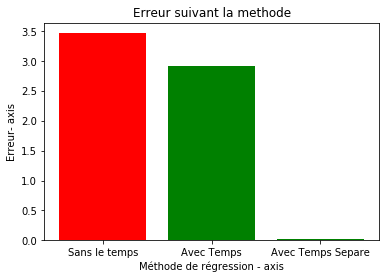

In [26]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare]
height = [abs(x) for x in height]

  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec Temps Separe'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green']) 

# naming the x-axis 
plt.xlabel('Méthode de régression - axis') 
# naming the y-axis 
plt.ylabel('Erreur- axis') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



Text(0,0.5,'moisture-percent')

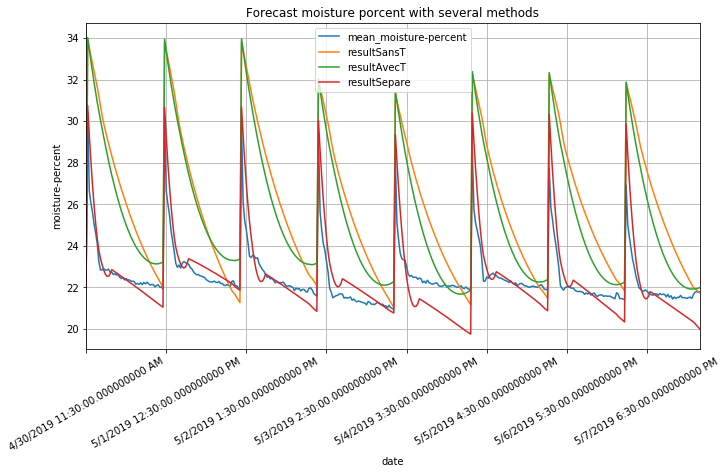

In [27]:
ax = dfTest.plot(x='date', y=['mean_moisture-percent','resultSansT','resultAvecT','resultSepare'],figsize=(11, 6),rot=30,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")

#dfTest.loc[dfTest['TAfterArrosage'] == 30]

In [28]:
reg3 = linear_model.Lasso(alpha=1.5)
reg3.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
reg3.intercept_
reg3.coef_


array([ -0.00000000e+00,  -0.00000000e+00,   1.73790721e-01,
         9.36190733e-05])

In [29]:
init = 0+48*0
dfTest['resultAutre'] = dfTest.index
position = dfTest.shape[1]-1

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg3.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrAutre = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,position].values)
print("Moyenne d'erreur : ",ErrAutre)

Moyenne d'erreur :  -3.12369286395


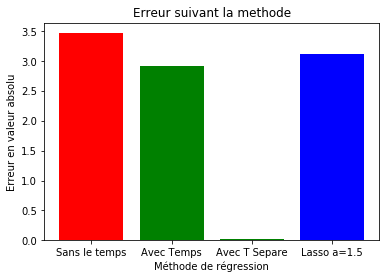

In [30]:
# x-coordinates of left sides of bars  
left = [1, 2, 3,4] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare,ErrAutre]
height = [abs(x) for x in height]
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec T Separe','Lasso a=1.5'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green','blue']) 
  
# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur en valeur absolu') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

Text(0,0.5,'moisture-percent')

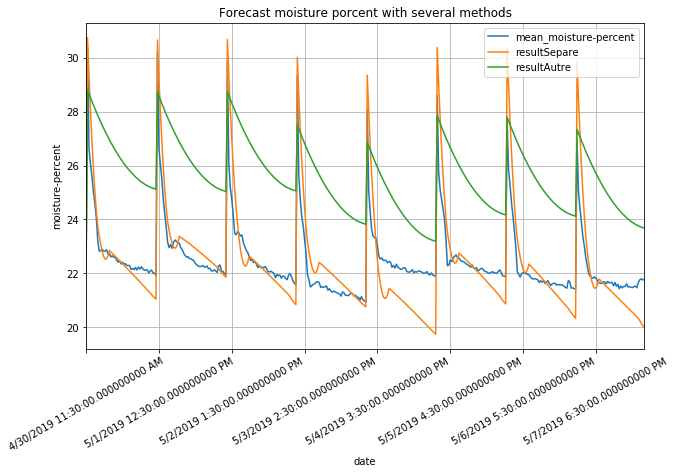

In [31]:
from pylab import *
ax = dfTest.plot(x='date', y=['mean_moisture-percent','resultSepare','resultAutre'],figsize=(10, 6),rot=30,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")


Text(0,0.5,'moisture-percent')

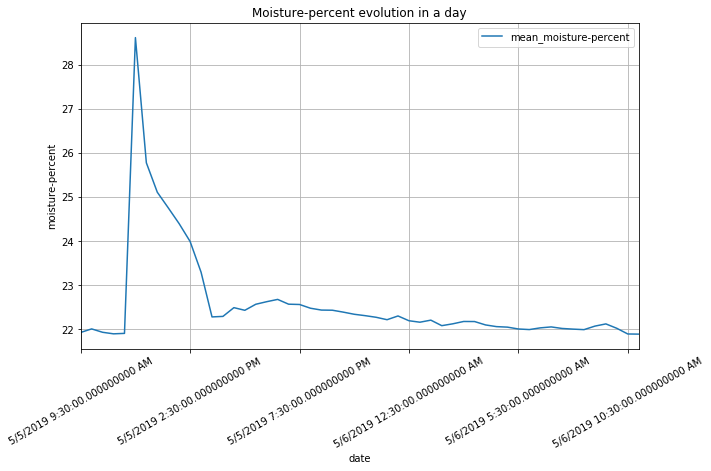

In [32]:
dfGraph = dfTest.iloc[range(44+48*4,96+48*4),:]
ax = dfGraph.plot(x='date', y=['mean_moisture-percent'],figsize=(10, 6),rot=30,grid=True, title="Moisture-percent evolution in a day")
ax.set_ylabel("moisture-percent")



In [33]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("Avec Temps Séparé : ", ErrSepare)
print("Avec Lasso a = 1.5 : ", ErrAutre)

Sans le temps :  -3.46953005488
Avec le temps :  -2.9166448874
Avec Temps Séparé :  -0.0180494314904
Avec Lasso a = 1.5 :  -3.12369286395


# Erreur après 24heures

L'erreur ci-dessous représente l'erreur à la dernière itération.

In [34]:
dfEnd = dfTest.loc[dfTest['TAfterArrosage'] == 0]
EndSans = np.mean(dfEnd.iloc[:,8]-dfEnd.iloc[:,1])
EndAvec = np.mean(dfEnd.iloc[:,9]-dfEnd.iloc[:,1])
EndSepare = np.mean(dfEnd.iloc[:,10]-dfEnd.iloc[:,1])
EndAutre = np.mean(dfEnd.iloc[:,11]-dfEnd.iloc[:,1])

print("Sans le temps : ", EndSans)
print("Avec le temps : ", EndAvec)
print("Avec Temps Séparé : ", EndSepare)
print("Avec Lasso a = 1.5 : ", EndAutre)

Sans le temps :  -0.0916737497714
Avec le temps :  0.870007936536
Avec Temps Séparé :  -0.762684256374
Avec Lasso a = 1.5 :  2.37590740033


In [35]:
regtest = linear_model.LinearRegression()
regtest.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)

regtest.coef_
regtest.intercept_

0.74272914889584452

In [36]:
    dfPure = df.loc[df['TAfterArrosage'] <= 30 ]

In [37]:
dfPure

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist
37,3/8/2019 10:30:00.000000000 AM,31.968333,25.800000,5.885000,0.316667,10,0,10
38,3/8/2019 11:00:00.000000000 AM,37.853333,26.116667,-2.026667,1.041667,0,30,10
85,3/9/2019 10:30:00.000000000 AM,31.540000,25.706667,5.731667,-0.018333,10,0,10
86,3/9/2019 11:00:00.000000000 AM,37.271667,25.688333,-1.688333,0.161667,0,30,10
133,3/10/2019 10:30:00.000000000 AM,31.476667,24.918333,5.533333,0.161667,10,0,10
134,3/10/2019 11:00:00.000000000 AM,37.010000,25.080000,-1.550000,0.186667,0,30,10
181,3/11/2019 10:30:00.000000000 AM,30.920000,24.921667,8.085000,0.096667,10,0,10
182,3/11/2019 11:00:00.000000000 AM,39.005000,25.018333,-2.571667,0.483333,0,30,10
229,3/12/2019 10:30:00.000000000 AM,28.846667,25.735000,8.016667,0.035000,10,0,10
230,3/12/2019 11:00:00.000000000 AM,36.863333,25.770000,-2.993333,0.515000,0,30,10
